# 5. 인공지능과 가위바위보 하기


1. 이미지 분류기 모델이 성공적으로 만들어졌는가? - 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? - 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? - 60% 이상 도달하였음

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/MyDrive/rock_scissor_paper'
images=glob.glob(image_path + "/*.jpg")

# train 모델

In [ ]:
import os
import glob
from PIL import Image

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/rock'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/paper'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/scissor'
resize_images(image_dir_path)

1712  images to be resized.
1712  images resized.
1689  images to be resized.
1689  images resized.
1669  images to be resized.
1669  images resized.


- 주먹 - 1712장
- 보   - 1689장
- 가위 - 1669장
- 총합 5070장의 사진으로 모델 train
- 사진크기를 224x224 ->  28x28로 리사이즈

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=5070):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5070 입니다.
x_train shape: (5070, 28, 28, 3)
y_train shape: (5070,)


- 리사이즈 한 각 사진을 라벨링으로 분류
- (가위 : 0, 바위 : 1, 보 : 2)

라벨:  0


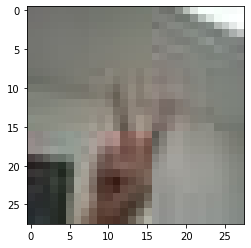

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[113])
print('라벨: ', y_train[1113])

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 바꿔 볼 수 있는 하이퍼파라미터
n_channel_1=128
n_channel_2=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu')) # 신경망
model.add(keras.layers.Dense(10, activation='softmax')) # 신경망

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

- train 모델 설명

---

- Conv2D - 레이어의 사용하는 이미지 특징의 수.
- Dense - 레이어의 분류기에 사용되는 뉴런의 숫자.
- MaxPooling2D - 공간적 데이터에 대한 최대값 풀링 작업.(사소한 변화는 전부 필터링)
- flatten - 2차원 자료를 1차원 자료로 바꿔서 전결합층에 전달.

In [ ]:
# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
159/159 [==============================] - 1s 4ms/step - loss: 4.6407 - accuracy: 0.7901
Epoch 2/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9848
Epoch 3/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9986
Epoch 4/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 5.7231e-04 - accuracy: 1.0000
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 3.5585e-04 - accuracy: 1.0000
Epoch 8/10
159/159 [==============================] - 1s 4ms/step - loss: 2.1918e-04 - accuracy: 1.0000
Epoch 9/10
159/159 [==============================] - 1s 4ms/step - loss: 1.7353e-04 - accuracy: 1.0000
Epoch 10/10
159/159 [==============================] - 1s 4ms/step - loss: 1.5366e-0

- 최종 학습 정확도가 1.0, 손실값은 1.5*10^-4\
- 학습이 잘된 것을 확인 할 수 있다.

# 테스트 모델

In [ ]:
image_test_path = '/content/drive/MyDrive/rock_scissor_paper/rsp_test'
images_test=glob.glob(image_test_path + "/*.jpg")

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_test_path = '/content/drive/MyDrive/rock_scissor_paper/rsp_test/scissor'
resize_images(image_test_path)
print("가위 테스트 이미지 resize 완료!")

# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_test_path = '/content/drive/MyDrive/rock_scissor_paper/rsp_test/rock'
resize_images(image_test_path)
print("바위 테스트 이미지 resize 완료!")

#보 테스트 이미지가 저장된 디렉토리 아래의 모든 .jpg 파일을 읽어들여서
image_test_path = '/content/drive/MyDrive/rock_scissor_paper/rsp_test/paper'
resize_images(image_test_path)
print("보 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 테스트 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 테스트 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 테스트 이미지 resize 완료!


- 테스트는 각 클래스별 100장씩 224x224 -> 24x24로 리사이즈 하여 진행

In [ ]:
import numpy as np

def test_data(test_path, number_of_data=5070):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(test_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(test_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(test_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
image_test_path = '/content/drive/MyDrive/rock_scissor_paper/rsp_test'
(x_test, y_test)=test_data(image_test_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


- train과 마찬가지로 리사이즈한 테스트 사진을 라벨링하고 행렬에 데이터로 저장한다.

라벨:  0


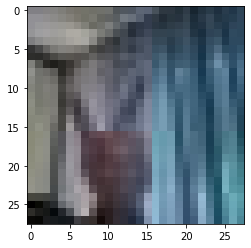

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[13])
print('라벨: ', y_test[13])

In [ ]:
test_all_loss, test_all_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_all_loss))
print("test_accuracy: {}".format(test_all_accuracy))

10/10 - 0s - loss: 2.3624 - accuracy: 0.6167 - 40ms/epoch - 4ms/step
test_loss: 2.3624460697174072 
test_accuracy: 0.6166666746139526


- 손실 2.3 / 정확도가 약 61.7%가 나온 것을 확인

# 회고

---

- 첫 딥러닝을 활용한 과제라서 조금 어려울 것이라고 생각했다. 10~20%의 정확도만 나오길래 파라미터를 계속 변화를 줘봤지만 큰 영향이 없다고 판단하였다. 그래서 처음에 찍은 사진인 1500장을 전부 폐기하고 다시 5070여장의 사진을 좀 더 공들여서 찍었다. 단지 사진을 바꿨을 뿐인데, 루브릭 요구사항을 바로 성취하였다. 

- 과제를 하나하나 해 나가면서 느끼는 것이지만, CV든 NLP든 AI 모델 구축에 있어서 데이터 전처리의 중요도가 80~90%의 비중을 차지하고 있다는 것을 다시 한번 느꼈다. 